In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Import Required Libraries

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Load and Preprocess Data

In [ ]:
# Date range
start_date = dt.datetime(2015,9,30)
end_date = dt.datetime(2018,9,30)

In [ ]:
# Read the CSV file and filter based on the date range
df = pd.read_csv('/content/Metro_Interstate_Traffic_Volume.csv', index_col='date_time', parse_dates=['date_time']).loc[start_date:end_date]
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2015-09-30 00:00:00,NaN,278.65,0.0,0.0,1,Clear,sky is clear,551
2015-09-30 02:00:00,NaN,277.54,0.0,0.0,1,Clear,sky is clear,273
2015-09-30 03:00:00,NaN,277.34,0.0,0.0,1,Clear,sky is clear,348
2015-09-30 04:00:00,NaN,277.21,0.0,0.0,1,Clear,sky is clear,947
2015-09-30 05:00:00,NaN,276.89,0.0,0.0,1,Clear,sky is clear,3021


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29499 entries, 2015-09-30 00:00:00 to 2018-09-30 00:00:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              40 non-null     object 
 1   temp                 29499 non-null  float64
 2   rain_1h              29499 non-null  float64
 3   snow_1h              29499 non-null  float64
 4   clouds_all           29499 non-null  int64  
 5   weather_main         29499 non-null  object 
 6   weather_description  29499 non-null  object 
 7   traffic_volume       29499 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 2.0+ MB


In [ ]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2018-09-29 20:00:00,NaN,280.55,0.0,0.0,90,Clouds,overcast clouds,3338
2018-09-29 21:00:00,NaN,280.40,0.0,0.0,90,Clouds,overcast clouds,2950
2018-09-29 22:00:00,NaN,280.54,0.0,0.0,90,Clouds,overcast clouds,2607
2018-09-29 23:00:00,NaN,280.32,0.0,0.0,90,Clouds,overcast clouds,3856
2018-09-30 00:00:00,NaN,280.30,0.0,0.0,90,Clouds,overcast clouds,1826


# EDA & Data Preprocessing

In [ ]:
# Check null value
df.isna().sum()

,0
holiday,29459
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
traffic_volume,0


In [ ]:
# Drop holiday Column
df = df.drop(['holiday'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29499 entries, 2015-09-30 00:00:00 to 2018-09-30 00:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp                 29499 non-null  float64
 1   rain_1h              29499 non-null  float64
 2   snow_1h              29499 non-null  float64
 3   clouds_all           29499 non-null  int64  
 4   weather_main         29499 non-null  object 
 5   weather_description  29499 non-null  object 
 6   traffic_volume       29499 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 1.8+ MB


In [ ]:
# Check duplicates values
df.duplicated().sum()

23

In [ ]:
# Drop duplicates values
df = df.drop_duplicates()
df.duplicated().sum()

0

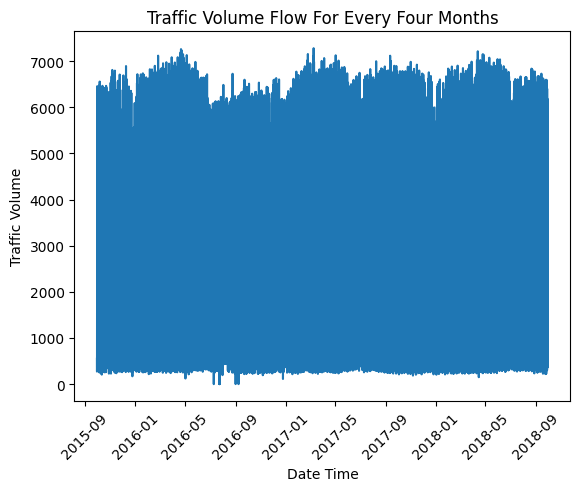

In [ ]:
# Visualization For Temperature Flow For Every Four Months
plt.plot(df['traffic_volume'])
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Flow For Every Four Months')
plt.xticks(rotation=45)
plt.show()

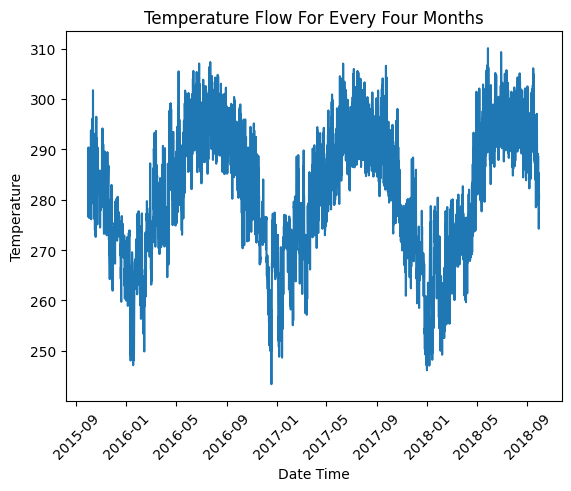

In [ ]:
# Visualization For Temperature Flow For Every Four Months
plt.plot(df['temp'])
plt.xlabel('Date Time')
plt.ylabel('Temperature')
plt.title('Temperature Flow For Every Four Months')
plt.xticks(rotation=45)
plt.show()

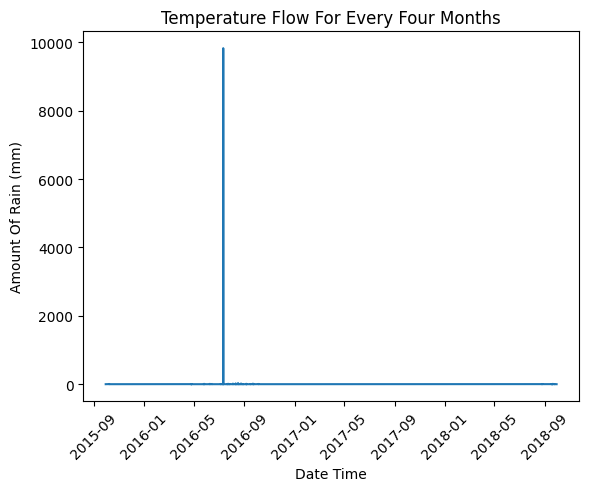

In [ ]:
# Visualization For The Amount in mm of rain that occurred in the hour, For Every Four Months
plt.plot(df['rain_1h'])
plt.xlabel('Date Time')
plt.ylabel('Amount Of Rain (mm)')
plt.title('Temperature Flow For Every Four Months')
plt.xticks(rotation=45)
plt.show()

In [ ]:
result = seasonal_decompose(df['traffic_volume'], model='additive', period=364)

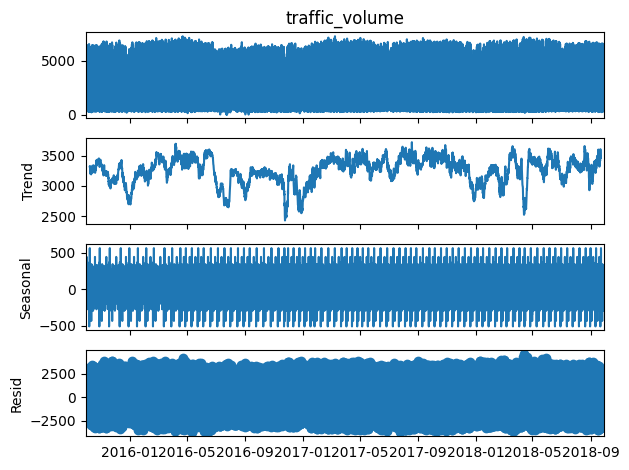

In [ ]:
result.plot()
plt.show()

In [ ]:
# Sort the dates
df = df.sort_index()
df.head()

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,
2015-09-30 00:00:00,278.65,0.0,0.0,1,Clear,sky is clear,551
2015-09-30 02:00:00,277.54,0.0,0.0,1,Clear,sky is clear,273
2015-09-30 03:00:00,277.34,0.0,0.0,1,Clear,sky is clear,348
2015-09-30 04:00:00,277.21,0.0,0.0,1,Clear,sky is clear,947
2015-09-30 05:00:00,276.89,0.0,0.0,1,Clear,sky is clear,3021


In [ ]:
# Label Encoder
label_encoder = LabelEncoder()
df['weather_main'] = label_encoder.fit_transform(df['weather_main'])
df['weather_description'] = label_encoder.fit_transform(df['weather_description'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29476 entries, 2015-09-30 00:00:00 to 2018-09-30 00:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp                 29476 non-null  float64
 1   rain_1h              29476 non-null  float64
 2   snow_1h              29476 non-null  float64
 3   clouds_all           29476 non-null  int64  
 4   weather_main         29476 non-null  int64  
 5   weather_description  29476 non-null  int64  
 6   traffic_volume       29476 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.8 MB


In [ ]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [ ]:
train_size, train_data.shape, test_data.shape

(23580, (23580, 7), (5896, 7))

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [ ]:
# Prepare the data
def create_dataset(dataset, time_step):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0:dataset.shape[1]]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [ ]:
X_train, Y_train = create_dataset(train_data_scaled, 12)
X_test, Y_test = create_dataset(test_data_scaled, 12)

In [ ]:
# Reshape the data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], train_data_scaled.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], test_data_scaled.shape[1])

In [ ]:
X_train.shape , Y_train.shape , X_test.shape , Y_test.shape

((23567, 12, 7), (23567,), (5883, 12, 7), (5883,))

# RNN

In [ ]:
modelRNN = Sequential()
modelRNN.add(SimpleRNN(units=128, return_sequences=True, input_shape=(12, 7)))
modelRNN.add(Dropout(0.2))

modelRNN.add(SimpleRNN(units=128, return_sequences=True))
modelRNN.add(Dropout(0.2))

modelRNN.add(SimpleRNN(units=75, return_sequences=False))
modelRNN.add(Dropout(0.2))

modelRNN.add(Dense(units=1))
modelRNN.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 12, 128)             │          17,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 12, 128)             │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 75)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 75)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              76 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,680 (256.56 KB)

 Trainable params: 65,680 (256.56 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
modelRNN.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
history= modelRNN.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=64, verbose=1)

Epoch 1/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 4.9793e-04 - val_loss: 1.3619e-04
Epoch 2/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 4.7518e-04 - val_loss: 1.6360e-04
Epoch 3/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 4.8934e-04 - val_loss: 1.8245e-04
Epoch 4/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - loss: 4.9589e-04 - val_loss: 1.2929e-04
Epoch 5/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 4.6736e-04 - val_loss: 1.3203e-04
Epoch 6/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 4.5738e-04 - val_loss: 1.7576e-04
Epoch 7/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - loss: 4.5625e-04 - val_loss: 1.7948e-04
Epoch 8/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 5.2553e-04 - val_loss: 2.5115e-04
Epoch 9/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - loss: 4.7208e-04 - val_loss: 1.6398e-04
Epoch 10/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 4.5070e-04 - val_loss: 2.6989e-04


In [ ]:
test_RNN = modelRNN.predict(X_test)

184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [ ]:
RMSE = math.sqrt(mean_squared_error(Y_test, test_RNN))
print(RMSE)

0.016428234436249668


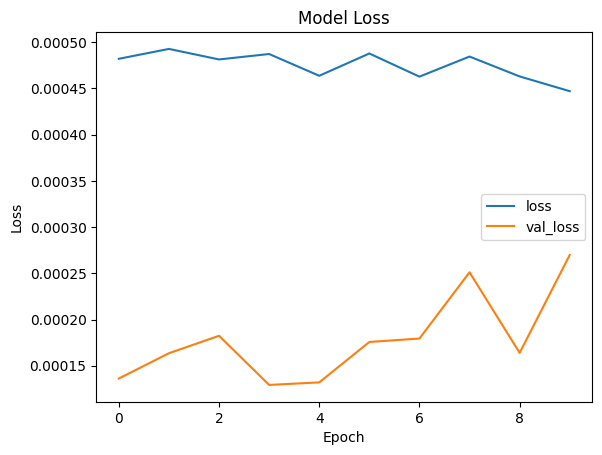

In [ ]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# LSTM

In [ ]:
modelLSTM = Sequential()
modelLSTM.add(LSTM(128, return_sequences=True, input_shape=(12, 7)))
modelLSTM.add(Dropout(0.2))

modelLSTM.add(LSTM(128, return_sequences=True))
modelLSTM.add(Dropout(0.2))

modelLSTM.add(LSTM(75, return_sequences=False))
modelLSTM.add(Dropout(0.2))

modelLSTM.add(Dense(1))
modelLSTM.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 128)             │          69,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 12, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 12, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 75)                  │          61,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 75)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              76 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 262,492 (1.00 MB)

 Trainable params: 262,492 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
modelLSTM.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
history= modelLSTM.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - loss: 0.0216 - val_loss: 0.0020
Epoch 2/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - loss: 0.0037 - val_loss: 0.0012
Epoch 3/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 4/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 40s 89ms/step - loss: 0.0026 - val_loss: 6.9044e-04
Epoch 5/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - loss: 0.0020 - val_loss: 7.7400e-04
Epoch 6/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 36s 97ms/step - loss: 0.0018 - val_loss: 3.4570e-04
Epoch 7/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - loss: 0.0014 - val_loss: 3.2901e-04
Epoch 8/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - loss: 0.0012 - val_loss: 4.7390e-04
Epoch 9/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 40s 92ms/step - loss: 0.0010 - val_loss: 2.1909e-04
Epoch 10/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 42s 93ms/step - loss: 9.0599e-04 - val_loss: 2.5139e-04


In [ ]:
test_LSTM = modelLSTM.predict(X_test)

184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step


In [ ]:
RMSE = mean_squared_error(Y_test, test_LSTM)
print(RMSE)

0.0002513901329944973


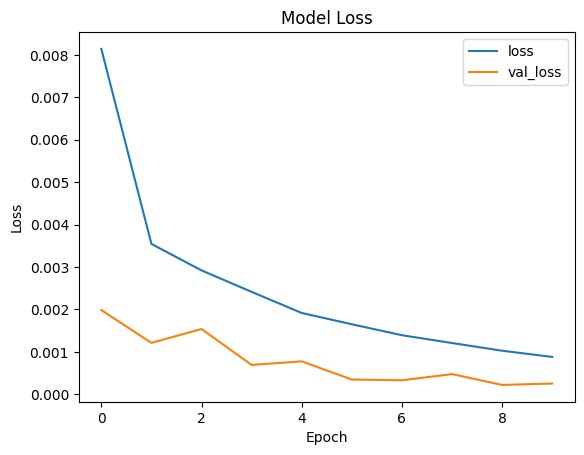

In [ ]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# GRU

In [ ]:
modelGRU = Sequential()
modelGRU.add(GRU(units=128, return_sequences=True, input_shape=(12, 7)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=128, return_sequences=True))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=75, return_sequences=False))
modelGRU.add(Dropout(0.2))

modelGRU.add(Dense(units=1))
modelGRU.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 12, 128)             │          52,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 12, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 12, 128)             │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 12, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 75)                  │          46,125 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 75)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              76 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197,881 (772.97 KB)

 Trainable params: 197,881 (772.97 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
modelGRU.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history= modelGRU.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 44s 102ms/step - loss: 0.0193 - val_loss: 0.0012
Epoch 2/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 39s 97ms/step - loss: 0.0032 - val_loss: 7.9550e-04
Epoch 3/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - loss: 0.0024 - val_loss: 8.7537e-04
Epoch 4/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 37s 100ms/step - loss: 0.0020 - val_loss: 7.6024e-04
Epoch 5/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - loss: 0.0017 - val_loss: 5.0333e-04
Epoch 6/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 38s 104ms/step - loss: 0.0014 - val_loss: 3.1597e-04
Epoch 7/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 37s 101ms/step - loss: 0.0012 - val_loss: 2.1657e-04
Epoch 8/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 43s 106ms/step - loss: 0.0010 - val_loss: 4.3832e-04
Epoch 9/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - loss: 9.4880e-04 - val_loss: 1.7881e-04
Epoch 10/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - loss: 8.7174e-04 - val_loss: 1.6037e-04


In [ ]:
test_GRU = modelGRU.predict(X_test)

184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step


In [ ]:
RMSE = math.sqrt(mean_squared_error(Y_test, test_GRU))
print(RMSE)

0.012663915531279017


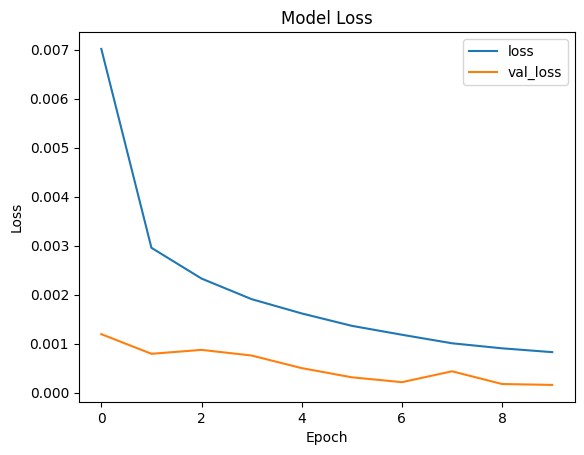

In [ ]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# Inverse



In [ ]:
Y_test_rescaled = scaler.inverse_transform(np.concatenate((Y_test.reshape(-1, 1), np.zeros((Y_test.shape[0], 6))), axis=1))[:, 0]
predictions_rescaled_RNN = scaler.inverse_transform(np.concatenate((test_RNN, np.zeros((test_RNN.shape[0], 6))), axis=1))[:, 0]
predictions_rescaled_LSTM = scaler.inverse_transform(np.concatenate((test_LSTM, np.zeros((test_LSTM.shape[0], 6))), axis=1))[:, 0]
predictions_rescaled_GRU = scaler.inverse_transform(np.concatenate((test_GRU, np.zeros((test_GRU.shape[0], 6))), axis=1))[:, 0]

# Visualization

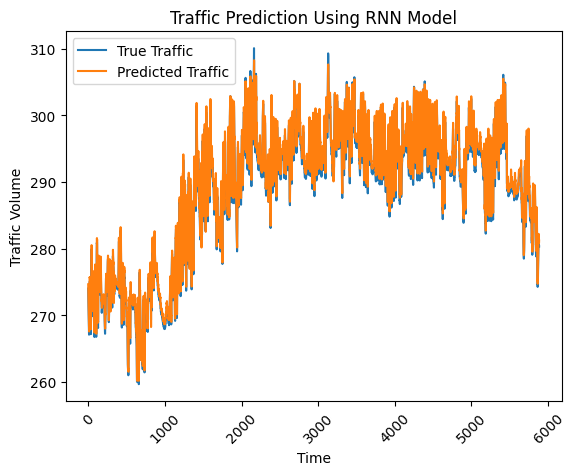

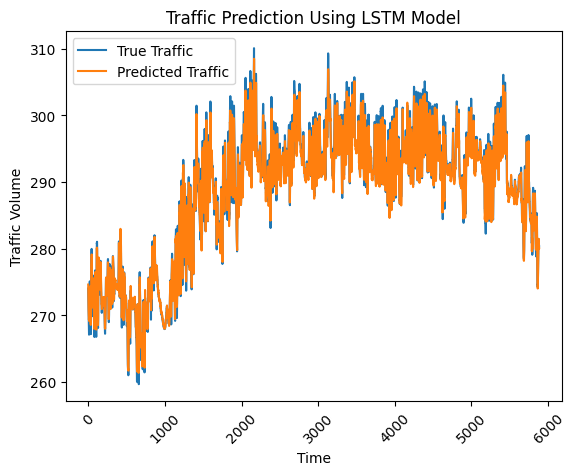

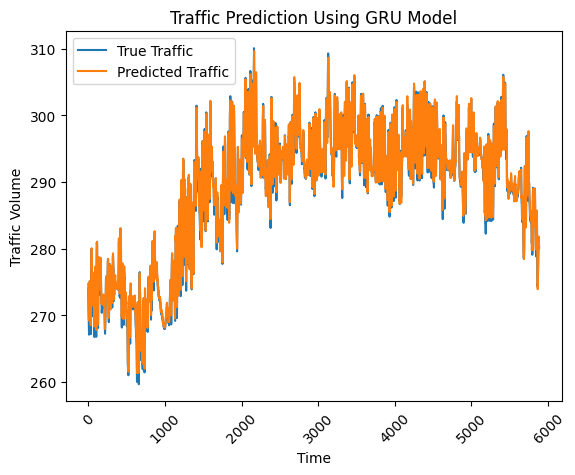

In [ ]:
# RNN
plt.plot(Y_test_rescaled, label='True Traffic')
plt.plot(predictions_rescaled_RNN , label='Predicted Traffic')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('Traffic Prediction Using RNN Model')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# LSTM
plt.plot(Y_test_rescaled, label='True Traffic')
plt.plot(predictions_rescaled_LSTM , label='Predicted Traffic')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('Traffic Prediction Using LSTM Model')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# GRU
plt.plot(Y_test_rescaled, label='True Traffic')
plt.plot(predictions_rescaled_GRU , label='Predicted Traffic')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('Traffic Prediction Using GRU Model')
plt.legend()
plt.xticks(rotation=45)
plt.show()